##Завантаження даних##

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/gdrive')
%cd /gdrive
path = '/gdrive/My Drive/Colab Notebooks/Datafiles/MedCPI/MedCPISmooth.csv'
data = pd.read_csv(path, header=0)
data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


,yearInt,Month,Quarter,value,PerMEDCPI,YEAR,MCPISM4,MCPISM8,MCPISMw_2,MCPISMw_8
0,1947,3,1,13.300,NaN,1947.166667,NaN,NaN,NaN,NaN
1,1947,6,1,13.500,1.504,1947.416667,1.504,1.504,1.504,1.504
2,1947,9,1,13.700,1.481,1947.666667,1.493,1.493,1.486,1.499
3,1947,12,1,13.900,1.460,1947.916667,1.482,1.482,1.465,1.491
4,1948,3,1,14.100,1.439,1948.166667,1.471,1.471,1.444,1.481
...,...,...,...,...,...,...,...,...,...,...
236,2006,3,1,332.700,0.971,2006.166667,1.151,1.084,1.022,1.042
237,2006,6,1,335.800,0.932,2006.416667,1.182,1.079,0.950,1.020
238,2006,9,1,338.900,0.923,2006.666667,1.082,1.071,0.928,1.001
239,2006,12,1,341.300,0.708,2006.916667,1.017,1.009,0.752,0.942


##Обробка даних##

Видалимо перші три стовпчики і перевіримо на наявність NaN.

In [3]:
data = data.drop(['yearInt', 'Month', 'Quarter'], axis = 1)
data

,value,PerMEDCPI,YEAR,MCPISM4,MCPISM8,MCPISMw_2,MCPISMw_8
0,13.300,NaN,1947.166667,NaN,NaN,NaN,NaN
1,13.500,1.504,1947.416667,1.504,1.504,1.504,1.504
2,13.700,1.481,1947.666667,1.493,1.493,1.486,1.499
3,13.900,1.460,1947.916667,1.482,1.482,1.465,1.491
4,14.100,1.439,1948.166667,1.471,1.471,1.444,1.481
...,...,...,...,...,...,...,...
236,332.700,0.971,2006.166667,1.151,1.084,1.022,1.042
237,335.800,0.932,2006.416667,1.182,1.079,0.950,1.020
238,338.900,0.923,2006.666667,1.082,1.071,0.928,1.001
239,341.300,0.708,2006.916667,1.017,1.009,0.752,0.942


In [4]:
data.isna().sum()

value        0
PerMEDCPI    1
YEAR         0
MCPISM4      1
MCPISM8      1
MCPISMw_2    1
MCPISMw_8    1
dtype: int64

Бачимо, що немає значень лише у першому рядку, тому його і видалимо.

In [5]:
data = data.drop(0, axis = 0)
data

,value,PerMEDCPI,YEAR,MCPISM4,MCPISM8,MCPISMw_2,MCPISMw_8
1,13.500,1.504,1947.416667,1.504,1.504,1.504,1.504
2,13.700,1.481,1947.666667,1.493,1.493,1.486,1.499
3,13.900,1.460,1947.916667,1.482,1.482,1.465,1.491
4,14.100,1.439,1948.166667,1.471,1.471,1.444,1.481
5,14.400,2.128,1948.416667,1.633,1.602,1.991,1.610
...,...,...,...,...,...,...,...
236,332.700,0.971,2006.166667,1.151,1.084,1.022,1.042
237,335.800,0.932,2006.416667,1.182,1.079,0.950,1.020
238,338.900,0.923,2006.666667,1.082,1.071,0.928,1.001
239,341.300,0.708,2006.916667,1.017,1.009,0.752,0.942


Розділимо дані і нормалізуємо їх.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(['value'],axis=1)
y = data['value']
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

X_train

array([[ 1.42219264,  0.2814607 ,  2.30304691,  2.06399869,  1.64277648,
         2.23904669],
       [ 0.43531369, -0.33919623,  0.3753254 ,  0.29162837,  0.40029175,
         0.43871464],
       [-0.32106347,  1.45060514, -0.37615925, -0.42294632, -0.33766009,
        -0.49634155],
       ...,
       [ 0.79831951, -1.50834067,  0.2466745 , -0.8636945 ,  0.64675897,
        -0.50506408],
       [-0.38593523,  1.42173738, -0.44967405, -0.45295471, -0.41594967,
        -0.54518776],
       [-0.76274356, -0.29589458, -0.97653014, -0.19038133, -0.95527793,
        -0.35503641]])

##Перевірка на корреляцію##

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

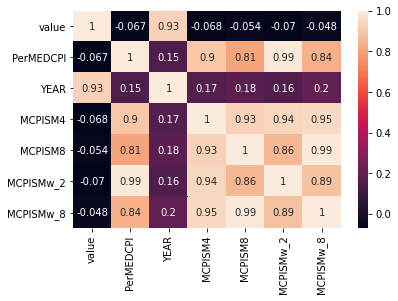

In [8]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Як ми бачимо рік та значення дуже сильно пов'язані.

##Підбір моделі##

Виконаємо лінійну регресію. 

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8923641371691912

Звичайна лінійна регресія дала дуже непоганий результат. Тепер використаємо гребеневу регресію. 

In [10]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8928928969017793

Оскільки результат був вже непоганий, то використання гребеневої регресії не дало великого приросту.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X, y)
X_test1 = pca.transform(X_test)
X_train1 = pca.transform(X_train)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [45]:
model = Ridge(0.1)
model.fit(X_train1, y_train)
model.score(X_test1, y_test)

0.8942851862798186

Найкращий результат отримали після того як прибрали одну змінну, і з кореляційної матриці маємо що ми прибрали 4 стовпчик.